## 좀머좀머 졸렬한 좀머씨. 쥐스킨트는 어느나라? 경시경시주시경시

# 타이타닉 생존율 예측 정확도 경시대회 
  -- seaborn titanic dataset으로 --

결과  
    - model_one : 0.8268  
    - model_two : 0.8491619825363159 (최대)


### 1. 데이터 불러오기 및 전처리
- feature selection 
- 결측치 처리 및 카테고리 값 레이블 인코딩

In [9]:
# 1. 피쳐 셀렉션

In [2]:
import seaborn as sns

In [5]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'deck']]
# df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [11]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [12]:
# age 컬럼은 평균으로 대체
df.age.fillna(df.age.mean(),inplace=True)
df.age.isna().sum()

0

In [14]:
# embarked 컬럼은 최빈값으로 대체
df.embarked.value_counts()
df.embarked.fillna('S', inplace=True)
df.embarked.isna().sum()

0

In [15]:
# 결측치 다수인 deck컬럼 삭제
df.drop(columns=['deck'],inplace=True)

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

- 레이블 인코딩. 카테코리 값 sex, embarked 컬럼 숫자로 변환 

In [18]:
from sklearn.preprocessing import LabelEncoder
df.sex = LabelEncoder().fit_transform(df.sex)
df.embarked = LabelEncoder().fit_transform(df.embarked)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### 2. Train / Test dataset 분리
    - 스케일링 
    - 훈련셋, 테스트셋 분리

In [20]:
import numpy as np

In [22]:
# survived 가 타켓임. 인덱스 0 
np.unique(df.values[:, 0], return_counts=True)

(array([0., 1.]), array([549, 342]))

In [ ]:
# y 데이터 준비  0 / 1 이라 인코딩, 스케일링 필요없음.
y = df.iloc[:, 0].values
y

In [ ]:
# X 데이터 준비 스탠다드 스케일링(표준정규분포) 하여 0~1 사이의 값으로 사용
df.iloc[:,1:].values

In [40]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.iloc[:,1:].values)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, random_state=2022, test_size=0.2
)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# input 모양은 피처 7개로 받기

((712, 7), (179, 7), (712,), (179,))

### 모델 정의 / 설정

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
model_one = Sequential([
    Dense(10, input_dim=7, activation='relu'),  #렐루 곱하기 렐루는 엘렐렐렐루
    Dense(33, activation='relu'),
    Dense(21, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_one.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 33)                363       
                                                                 
 dense_2 (Dense)             (None, 21)                714       
                                                                 
 dense_3 (Dense)             (None, 1)                 22        
                                                                 
Total params: 1,179
Trainable params: 1,179
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_one.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- 모델저장

In [51]:
import os
if not os.path.exists('model'):
    os.mkdir('model')

In [53]:
model_path = 'model/best_titanic.h5'

- 모델 학습 및 저장

In [54]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
hist = model_one.fit(X_train, y_train, validation_split=0.2, verbose=0,
                     epochs=200, batch_size=200,
                     callbacks=[checkpoint])

- 베스트 모델 로딩후 평가

In [59]:
from tensorflow.keras.models import load_model
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8268


[0.39294442534446716, 0.826815664768219]

- 학습과정 시각화

In [60]:
import matplotlib.pyplot as plt
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

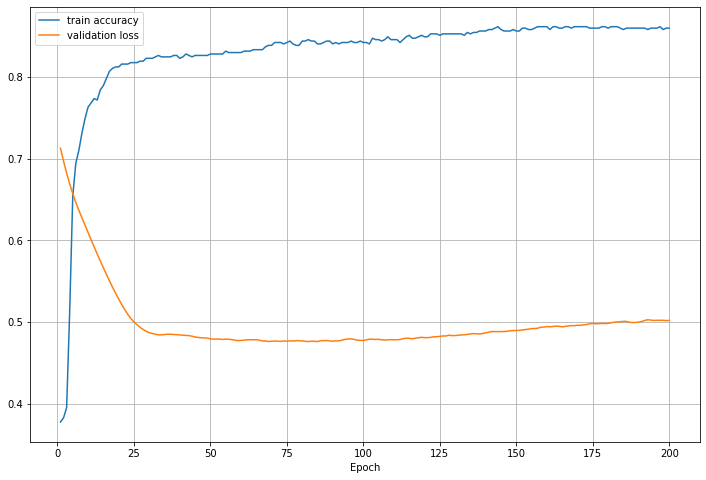

In [61]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

#### model_two
- 레이어를 늘리고 , 노드수를 늘리면 성능향상이 될까?

In [63]:
model_two = Sequential([
    Dense(100, input_dim=7, activation='relu'),  #렐루 곱하기 렐루는 엘렐렐렐루
    Dense(100, activation='relu'),
    Dense(21, activation='relu'),
    Dense(11, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_two.summary() 
# 파라미터의 총수가 많이 늘었다.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               800       
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 21)                2121      
                                                                 
 dense_7 (Dense)             (None, 11)                242       
                                                                 
 dense_8 (Dense)             (None, 1)                 12        
                                                                 
Total params: 13,275
Trainable params: 13,275
Non-trainable params: 0
_________________________________________________________________


In [64]:
model_two.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20)

In [65]:
model_path = 'model/titanic_two.h5'
checkpoint = ModelCheckpoint(
    model_path, monitor='val_loss', verbose=2, save_best_only=True
)

In [68]:
hist = model_two.fit(X_train, y_train, validation_split=0.2, verbose=2,
                 epochs = 200, batch_size=200, 
                 callbacks = [checkpoint, early_stopping])

Epoch 1/200

Epoch 00001: val_loss improved from inf to 0.63983, saving model to model/titanic_two.h5
3/3 - 1s - loss: 0.6609 - accuracy: 0.6872 - val_loss: 0.6398 - val_accuracy: 0.6573 - 847ms/epoch - 282ms/step
Epoch 2/200

Epoch 00002: val_loss improved from 0.63983 to 0.60816, saving model to model/titanic_two.h5
3/3 - 0s - loss: 0.6236 - accuracy: 0.7364 - val_loss: 0.6082 - val_accuracy: 0.7692 - 64ms/epoch - 21ms/step
Epoch 3/200

Epoch 00003: val_loss improved from 0.60816 to 0.57490, saving model to model/titanic_two.h5
3/3 - 0s - loss: 0.5867 - accuracy: 0.8049 - val_loss: 0.5749 - val_accuracy: 0.7902 - 72ms/epoch - 24ms/step
Epoch 4/200

Epoch 00004: val_loss improved from 0.57490 to 0.54084, saving model to model/titanic_two.h5
3/3 - 0s - loss: 0.5488 - accuracy: 0.8207 - val_loss: 0.5408 - val_accuracy: 0.7902 - 62ms/epoch - 21ms/step
Epoch 5/200

Epoch 00005: val_loss improved from 0.54084 to 0.51183, saving model to model/titanic_two.h5
3/3 - 0s - loss: 0.5106 - accura

In [69]:
# 모델평가 및 시각화

In [70]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.4039 - accuracy: 0.8492


[0.40386852622032166, 0.8491619825363159]

In [71]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)


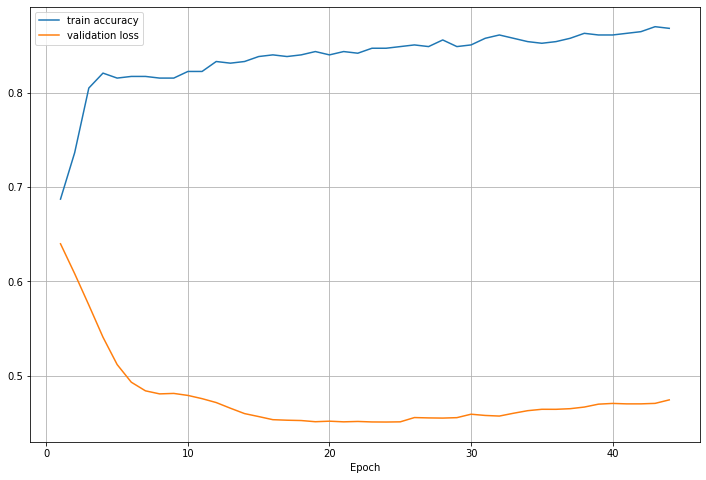

In [72]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()
# 20번 정도 많에 최저 validation loss 찾아.